# Отбор и селекция признаков

## Способ представления данных

In [751]:
#Импортируем необходимые библиотеки

#Для матричных вычислений
import numpy as np
#Для анализа и предобработки данных
import pandas as pd
#Для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

#Метрики
from sklearn import metrics
#Методы разделения и валидации
from sklearn import model_selection
#Ансамбли
from sklearn import ensemble
#Линейные модели
from sklearn import linear_model

#Стиль отрисовки seaborn
plt.style.use('seaborn-v0_8')
%matplotlib inline

In [752]:
#Загрузим данные
data = pd.read_excel('data/data_ford_price.xlsx')
display(data.head())

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
4,13865,2010,3,8,166062,clean,automatic,4wd,NaN,49.210949,-123.114720,NaN


In [753]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


## Кодирование признаков

Обратимся к нашим данным. Нас просят предсказать цену автомобиля. Для обучения модели выделим целевой столбец:

In [754]:
y = data['price']
X = data.drop(columns='price')

Попробуем применить линейную регрессию на «сырых» данных:

In [755]:
# lr = linear_model.LinearRegression()
# lr.fit(X, y)

Мы получим ошибку с комментарием о том, что не удалось превратить строковое значение в число с плавающей точкой (float).

Давайте посмотрим на кодирование признака Образование способом «один-против-всех» (one vs all):

In [756]:
from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()

education = ['нет', 'начальное', 'среднее', 'BSc', 'MSc', 'начальное', 'PhD']

lb.fit(education)

print('категории:', lb.classes_)

lb.transform(['нет', 'MSc'])

категории: ['BSc' 'MSc' 'PhD' 'начальное' 'нет' 'среднее']


array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0]])

Посмотрим на число уникальных значений номинальных признаков title_status, transmission, drive, size и cylinders:

In [757]:
columns_to_change = ['cylinders', 'title_status', 'transmission',
                     'drive', 'size']

for column in columns_to_change:
    print('Число уникальных значений признака {}:'.format(column), data[column].nunique())

Число уникальных значений признака cylinders: 6
Число уникальных значений признака title_status: 5
Число уникальных значений признака transmission: 3
Число уникальных значений признака drive: 3
Число уникальных значений признака size: 4


Итак, нам подходит однократное кодирование. Применим его к выбранным столбцам. Так как у нас нет отдельной тестовой выборки, то мы используем только один метод — fit_transform(). В качестве аргумента передаём таблицу с выбранными для преобразования признаками.

С помощью метода get_feature_names_out() получим список новых названий колонок:

In [758]:
from sklearn.preprocessing import OneHotEncoder

one_hot_encoder = OneHotEncoder()

#'Учим' и сразу применяем преобразование к выборке, 
#результат переводим в массив
data_onehot = one_hot_encoder.fit_transform(data[columns_to_change]).toarray()

#Запишем полученные названия новых колонок в отдельную переменную
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
print(column_names)

['cylinders_3' 'cylinders_4' 'cylinders_5' 'cylinders_6' 'cylinders_8'
 'cylinders_10' 'title_status_clean' 'title_status_lien'
 'title_status_missing' 'title_status_rebuilt' 'title_status_salvage'
 'transmission_automatic' 'transmission_manual' 'transmission_other'
 'drive_4wd' 'drive_fwd' 'drive_rwd' 'drive_nan' 'size_compact'
 'size_full-size' 'size_mid-size' 'size_sub-compact' 'size_nan']


### Задание 3.7

In [759]:
data_onehot = pd.DataFrame(data_onehot, index=data.index, columns=column_names)
display(data_onehot)

,cylinders_3,cylinders_4,cylinders_5,cylinders_6,cylinders_8,cylinders_10,title_status_clean,title_status_lien,title_status_missing,title_status_rebuilt,...,transmission_other,drive_4wd,drive_fwd,drive_rwd,drive_nan,size_compact,size_full-size,size_mid-size,size_sub-compact,size_nan
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7012,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7013,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
7014,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
7015,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [760]:
data_new = pd.concat([data, data_onehot], axis=1)

In [761]:
data_new = data_new.drop(columns=columns_to_change)

In [762]:
display(data_new.shape)

(7017, 30)

## Обработка пропусков и выбросов

In [763]:
display(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7017 entries, 0 to 7016
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         7017 non-null   int64  
 1   year          7017 non-null   int64  
 2   condition     7017 non-null   int64  
 3   cylinders     7017 non-null   int64  
 4   odometer      7017 non-null   int64  
 5   title_status  7017 non-null   object 
 6   transmission  7017 non-null   object 
 7   drive         6626 non-null   object 
 8   size          5453 non-null   object 
 9   lat           7017 non-null   float64
 10  long          7017 non-null   float64
 11  weather       6837 non-null   float64
dtypes: float64(3), int64(5), object(4)
memory usage: 658.0+ KB


None

In [764]:
#Посмотрим данные на пропуски в более удобном формате
data.isnull().sum()

price              0
year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather          180
dtype: int64

Посмотрим, что будет, если просто убрать все строки с пропусками в столбце weather:

In [765]:
data[~data['weather'].isna()]

,price,year,condition,cylinders,odometer,title_status,transmission,drive,size,lat,long,weather
0,43900,2016,4,6,43500,clean,automatic,4wd,full-size,36.471500,-82.483400,59.0
1,15490,2009,2,8,98131,clean,automatic,4wd,full-size,40.468826,-74.281734,52.0
2,2495,2002,2,8,201803,clean,automatic,4wd,full-size,42.477134,-82.949564,45.0
3,1300,2000,1,8,170305,rebuilt,automatic,4wd,full-size,40.764373,-82.349503,49.0
5,6995,2003,3,8,167662,clean,automatic,4wd,full-size,45.518031,-122.578752,50.0
...,...,...,...,...,...,...,...,...,...,...,...,...
7012,22500,2015,3,6,23500,clean,automatic,rwd,full-size,32.680700,-117.169800,59.0
7013,5975,2005,2,8,0,clean,automatic,rwd,full-size,38.213303,-85.785762,50.0
7014,9999,2006,3,8,161514,clean,automatic,NaN,full-size,37.609783,-120.995406,59.0
7015,10900,2011,2,8,164000,clean,automatic,4wd,full-size,43.140600,-93.385000,47.0


### Задание 4.2

Какая доля строк в датасете останется, если убрать пропуски в столбце size? Ответ округлите до двух знаков после точки-разделителя.

In [766]:
round(data[~data['size'].isna()].shape[0] / data.shape[0], 2)

0.78

В качестве регрессора воспользуемся линейной моделью, а качество оценим с помощью коэффициента детерминации. Также нам потребуется разделить модель на обучающую и тестовую выборки.

In [767]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

Удалим данные с пропусками:

In [768]:
X = X.dropna()

Выберем все оставшиеся индексы таблицы x с помощью метода index(), а затем используем .iloc[], чтобы получить подгруппу целевых значений, соответствующую полученным индексам.

In [769]:
y = y.iloc[X.index]

Проверьте, что переменные x и y имеют одинаковую длину.

In [770]:
X.shape[0] == y.shape[0]

True

Разделим выборку на тренировочную и тестовую в соотношении 80/20:

In [771]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

Проведём кодирование OneHot-методом категориальных переменных.

In [772]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

Обучаем энкодер и сразу применяем преобразование к выборке. Результат переводим в массив:

In [773]:
X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

Затем применяем полученное преобразование к тестовой выборке. Результат переводим в массив:

In [774]:
X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

Для удобства сохраним полученные названия новых колонок в отдельную переменную:

In [775]:
columns = one_hot_encoder.get_feature_names_out(columns_to_change)
columns[:10]

array(['cylinders_3', 'cylinders_4', 'cylinders_5', 'cylinders_6',
       'cylinders_8', 'cylinders_10', 'title_status_clean',
       'title_status_lien', 'title_status_missing',
       'title_status_rebuilt'], dtype=object)

Теперь у нас есть массив закодированных признаков и наша изначальная таблица. Чтобы соединить эти данные, переведём массив в формат DataFrame.

In [776]:
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

Переустановим индексацию в таблицах, применив подряд сразу два метода: reset_index() — для изменения индексов с рандомных на последовательные от 0 до n и drop(['index'], axis = 1) — для удаления образовавшегося столбца 'index'.

In [777]:
X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)

y_train = y_train.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)

Объединяем таблицы и удаляем старые категориальные признаки:

In [778]:
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)

Настало время обучить модель. Для этого создаём объект класса LinearRegression.

In [779]:
lr_model = LinearRegression()

In [780]:
#Обучаем модель
lr_model.fit(X_train_new, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [781]:
#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train_new)
#Делаем предсказание для тествой выборки
y_test_predict = lr_model.predict(X_test_new)

print('Train r2 score: {:.3f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2 score: {:.3f}'.format(r2_score(y_test, y_test_predict)))

Train r2 score: 0.647
Test r2 score: 0.693


→ Теперь давайте попробуем заполнить пропуски константными значениями и обучить модель заново. Плюс такого подхода состоит в том, что мы предотвращаем потерю данных, которая происходит при удалении строк или столбцов. Основной минус — в снижении разброса (разнообразия) признаков.

Заполним числовой столбец средним значением, округлив его до целого числа:

In [782]:
import numpy as np

X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']), 0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_test['weather']), 0))

Для простоты воспользуемся заполнением наиболее частым значением категориальных признаков. Для этого сначала определим их в наших признаках, использовав комбинацию методов value_counts() и head():

In [783]:
X_train['drive'].value_counts(True).head(1)

drive
4wd    0.736602
Name: proportion, dtype: float64

In [784]:
X_train['size'].value_counts(True).head(1)

size
full-size    0.830089
Name: proportion, dtype: float64

In [785]:
X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')

X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

После обучения модели получился следующий результат:

In [786]:
data = pd.read_excel('data/data_ford_price.xlsx')

y = data['price']
X = data.drop(columns='price')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

import numpy as np

X_train['weather'] = X_train['weather'].fillna(np.round(np.mean(X_train['weather']), 0))
X_test['weather'] = X_test['weather'].fillna(np.round(np.mean(X_test['weather']), 0))

X_train['size'] = X_train['size'].fillna('full-size')
X_train['drive'] = X_train['drive'].fillna('4wd')

X_test['size'] = X_test['size'].fillna('full-size')
X_test['drive'] = X_test['drive'].fillna('4wd')

from sklearn.preprocessing import OneHotEncoder
one_hot_encoder = OneHotEncoder()

X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()

X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

columns = one_hot_encoder.get_feature_names_out(columns_to_change)

X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)

y_train = y_train.reset_index().drop(['index'], axis=1)
y_test = y_test.reset_index().drop(['index'], axis=1)

X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

X_train_new = X_train_new.drop(columns=columns_to_change)
X_test_new = X_test_new.drop(columns=columns_to_change)



lr_model = LinearRegression()

#Обучаем модель
lr_model.fit(X_train_new, y_train)

#Делаем предсказание для тренировочной выборки
y_train_predict = lr_model.predict(X_train_new)
#Делаем предсказание для тествой выборки
y_test_predict = lr_model.predict(X_test_new)

print('Train r2 score: {:.3f}'.format(r2_score(y_train, y_train_predict)))
print('Test r2 score: {:.3f}'.format(r2_score(y_test, y_test_predict)))


Train r2 score: 0.649
Test r2 score: 0.465


Приведённые методы обработки отсутствующих значений не учитывают корреляционную связь признака, содержащего пропуски, с остальными. Признаки, не имеющие NaN, можно использовать для прогнозирования пропущенных значений. Строится модель регрессии или классификации в зависимости от характера (категорийного или непрерывного) признака, имеющего пропущенное значение.

In [787]:
#Импортируем необходимые модули
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import OneHotEncoder

#Скопируем данные в отдельную переменную

copy_X = X.copy()

#В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_copy_X = copy_X[copy_X['weather'].isnull()]
#И удалим эти срочки из таблицы
copy_X.dropna(inplace=True)

#Определим целевой признак и факторы
y_train = copy_X['weather']
X_train = copy_X.drop(['size', 'weather', 'drive'], axis=1)
X_test = test_copy_X.drop(['size', 'weather', 'drive'], axis=1)

#Создадим кодировщик 
one_hot_encoder = OneHotEncoder()
categorial_cols = ['cylinders', 'title_status', 'transmission']

#Закодируем категориальные признаки 
#(обучаем кодировщик только на тренировочной выборке)
X_train_onehot = one_hot_encoder.fit_transform(X_train[categorial_cols]).toarray()
X_test_onehot = one_hot_encoder.transform(X_test[categorial_cols]).toarray()

#Результаты преобразуем обратно в DF для удобства
columns = one_hot_encoder.get_feature_names_out(categorial_cols)
X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

#Сбросим индексы таблиц
X_train = X_train.reset_index().drop(['index'], axis=1)
X_test = X_test.reset_index().drop(['index'], axis=1)
y_train = y_train.reset_index().drop(['index'], axis=1)

#Добавим результаты кодирования к исходным таблицам 
X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)

#Удалим столбцы, которые уже были закодированы
X_train_new = X_train_new.drop(columns=categorial_cols)
X_test_new = X_test_new.drop(columns=categorial_cols)

#Создадим модель линейной регрессии и обучим ее на задачу предсказания пропусков
model = LinearRegression()
model.fit(X_train_new, y_train)

#Сделаем предсказание целевой переменной (пропущенных значений в признаке weather)
y_pred = model.predict(X_test_new)

display(y_pred[:10])


array([[40.91435555],
       [40.7637233 ],
       [39.74866152],
       [41.2755305 ],
       [40.31791932],
       [41.10796547],
       [41.15337846],
       [39.94866488],
       [41.10796547],
       [40.7217165 ]])

### Задание 4.5

In [788]:
for i, ni in enumerate(test_copy_X.index):
    X.loc[ni, 'weather'] = y_pred[i]

X.isnull().sum()

year               0
condition          0
cylinders          0
odometer           0
title_status       0
transmission       0
drive            391
size            1564
lat                0
long               0
weather            0
dtype: int64

In [789]:
def encode_cat_features(columns_to_change, X_train, X_test, y_train):
    one_hot_encoder = OneHotEncoder()
    X_train_onehot = one_hot_encoder.fit_transform(X_train[columns_to_change]).toarray()
    X_test_onehot = one_hot_encoder.transform(X_test[columns_to_change]).toarray()

    columns = one_hot_encoder.get_feature_names_out(columns_to_change)
    
    X_train_onehot_df = pd.DataFrame(X_train_onehot, columns=columns)
    X_test_onehot_df = pd.DataFrame(X_test_onehot, columns=columns)

    X_train = X_train.reset_index().drop(['index'], axis = 1)
    X_test = X_test.reset_index().drop(['index'], axis = 1)
    y_train = y_train.reset_index().drop(['index'], axis = 1)

    X_train_new = pd.concat([X_train, X_train_onehot_df], axis=1)
    X_test_new = pd.concat([X_test, X_test_onehot_df], axis=1)
    
    X_train_new = X_train_new.drop(columns=columns_to_change)
    X_test_new = X_test_new.drop(columns=columns_to_change)

    return X_train_new, X_test_new

Более простой вариант решения

In [790]:
#Скопируем данные в отдельную переменную
copy_X = X.copy()
#В качестве тестовой выборки возьмем строки с пропусками в признаке weather
test_copy_X = copy_X[copy_X['size'].isnull()]
#И удалим эти срочки из таблицы
copy_X.dropna(inplace=True)

#Определим целевой признак и факторы
y_train = copy_X['size']
X_train = copy_X.drop(['size', 'drive'], axis=1)
X_test = test_copy_X.drop(['size', 'drive'], axis=1)

X_train_new, X_test_new = encode_cat_features(categorial_cols, X_train, X_test, y_train)

In [791]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_new, y_train)
 
y_pred = model.predict(X_test_new)
y_pred

c:\Program Files (x86)\Python\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning:

lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array(['full-size', 'full-size', 'full-size', ..., 'full-size',
       'full-size', 'full-size'], dtype=object)

In [792]:
for i, ni in enumerate(test_copy_X.index):
    X.loc[ni, 'size'] = y_pred[i]

X.isnull().sum()

year              0
condition         0
cylinders         0
odometer          0
title_status      0
transmission      0
drive           391
size              0
lat               0
long              0
weather           0
dtype: int64

### Работа с выбросами

Посмотрим, как обработка выбросов влияет на качество модели регрессии. В качестве метрики воспользуемся MAE.

Для начала сформируем baseline-модель. Проведём следующую предобработку: для простоты уберём категориальные столбцы из данных и затем удалим строки с пропусками.

In [793]:
data = data[['price', 'year', 'cylinders', 'odometer', 'lat', 'long', 'weather']]
data.dropna(inplace=True)

y = data['price']
X = data.drop(columns='price')
X.head()

,year,cylinders,odometer,lat,long,weather
0,2016,6,43500,36.471500,-82.483400,59.0
1,2009,8,98131,40.468826,-74.281734,52.0
2,2002,8,201803,42.477134,-82.949564,45.0
3,2000,8,170305,40.764373,-82.349503,49.0
5,2003,8,167662,45.518031,-122.578752,50.0


In [794]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae))

MAE: 4682.957


Первый алгоритм, который мы применим, — Isolation Forest, или iForest. Это алгоритм обнаружения аномалий на основе дерева.

Библиотека scikit-learn предоставляет реализацию Isolation Forest в классе IsolationForest.

Одним из основных гиперпараметров модели является contamination («загрязнение»), который используется для оценки количества выбросов в наборе данных. Его значение находится в диапазоне от 0.0 до 0.5 и по умолчанию равно 0.1.

In [795]:
from sklearn.ensemble import IsolationForest

#Ищем выбросы в обучающей выборке
iso = IsolationForest(contamination=0.1)
y_pred = iso.fit_predict(X_train)

#Выберем все строки, которые не являются выбрсоами
mask = y_pred != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae))

(4306, 6) (4306,)
MAE: 4421.738


Следующий метод — Local Outlier Factor, или LOF. Это метод, который пытается использовать идею ближайших соседей для обнаружения выбросов.

Библиотека scikit-learn обеспечивает реализацию этого подхода в классе LocalOutlierFactor.

In [796]:
from sklearn.neighbors import LocalOutlierFactor

lof = LocalOutlierFactor()
y_pred = lof.fit_predict(X_train)

mask = y_pred != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae))

(3948, 6) (3948,)
MAE: 4424.673


c:\Program Files (x86)\Python\Lib\site-packages\sklearn\neighbors\_lof.py:322: UserWarning:

Duplicate values are leading to incorrect results. Increase the number of neighbors for more accurate results.



Напоследок рассмотрим Minimum Covariance Determinant, или MCD.

Этот подход можно обобщить, определив гиперсферу (эллипсоид), которая покрывает нормальные данные, а данные, выходящие за пределы этой формы, считаются выбросами. Эффективная реализация этого метода для многомерных данных известна как детерминант минимальной ковариации (MCD).

Библиотека scikit-learn предоставляет доступ к этому методу через класс EllipticEnvelope.

In [797]:
from sklearn.covariance import EllipticEnvelope

ee = EllipticEnvelope(contamination=0.01)
y_pred = ee.fit_predict(X_train)

mask = y_pred != -1
X_train, y_train = X_train[mask], y_train[mask]

print(X_train.shape, y_train.shape)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print('MAE: {:.3f}'.format(mae))

(3908, 6) (3908,)
MAE: 4431.934


## Масштабирование признаков

Давайте посмотрим, как StandardScaler, MinMax и RobustScaler справятся с нашими данными. Для наглядности будем использовать три столбца.

In [798]:
#StandardScaler
data = data[['price', 'year', 'weather']]
data.dropna(inplace=True)
data_scaled = data.copy()
col_names = ['price', 'weather']
X = data_scaled[col_names]

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[col_names] = scaler.fit_transform(X.values)
data_scaled

,price,year,weather
0,2.558728,2016,0.862068
1,0.067373,2009,-0.017965
2,-1.072197,2002,-0.897998
3,-1.176990,2000,-0.395122
5,-0.677579,2003,-0.269403
...,...,...,...
7012,0.682100,2015,0.862068
7013,-0.767025,2005,-0.269403
7014,-0.414149,2006,0.862068
7015,-0.335138,2011,-0.646560


In [799]:
y = data_scaled['year']
X = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
print('MAE: {:.3f}'.format(mae))

MAE: 3.041


In [800]:
#MinMaxScaler
data = data[['price', 'year', 'weather']]
data.dropna(inplace=True)
data_scaled = data.copy()
col_names = ['price', 'weather']
X = data_scaled[col_names]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

data_scaled[col_names] = scaler.fit_transform(X.values)
data_scaled

,price,year,weather
0,0.146575,2016,0.714286
1,0.051716,2009,0.547619
2,0.008327,2002,0.380952
3,0.004337,2000,0.476190
5,0.023352,2003,0.500000
...,...,...,...
7012,0.075122,2015,0.714286
7013,0.019947,2005,0.500000
7014,0.033382,2006,0.714286
7015,0.036391,2011,0.428571


In [801]:
y = data_scaled['year']
X = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
print('MAE: {:.3f}'.format(mae))

MAE: 3.041


In [802]:
#RobustScaler
data = data[['price', 'year', 'weather']]
data.dropna(inplace=True)
data_scaled = data.copy()
col_names = ['price', 'weather']
X = data_scaled[col_names]

from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()

data_scaled[col_names] = scaler.fit_transform(X.values)
data_scaled

,price,year,weather
0,1.982455,2016,0.571429
1,0.189460,2009,0.071429
2,-0.630672,2002,-0.428571
3,-0.706090,2000,-0.142857
5,-0.346671,2003,-0.071429
...,...,...,...
7012,0.631871,2015,0.571429
7013,-0.411044,2005,-0.071429
7014,-0.157084,2006,0.571429
7015,-0.100221,2011,-0.285714


In [803]:
y = data_scaled['year']
X = data_scaled.drop(columns='year')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

model = LinearRegression()
model.fit(X_train, y_train)
y_predicted = model.predict(X_test)

mae = mean_absolute_error(y_test, y_predicted)
print('MAE: {:.3f}'.format(mae))

MAE: 3.041


### Задание 5.2

Отмасштабируйте признак price с помощью RobustScaler.
В качестве ответа запишите результат выполнения кода data['price'][1]. Ответ округлите до двух знаков после точки-разделителя.

In [804]:
print('First scaled price: {:.2f}'.format(data_scaled['price'][1]))

First scaled price: 0.19


## Трансформация распределений признаков

### Quantile Transformer

Этот метод трансформации признаков преобразует распределение переменной в нормальное или равномерное распределение и масштабирует его соответствующим образом.

Поскольку этот метод изменяет само распределение переменных, из-за этого скейлера линейные отношения между переменными могут быть разрушены. Таким образом, лучше всего использовать его для нелинейных данных.

Применим данное преобразование к признаку year. Для начала посмотрим на его распределение.

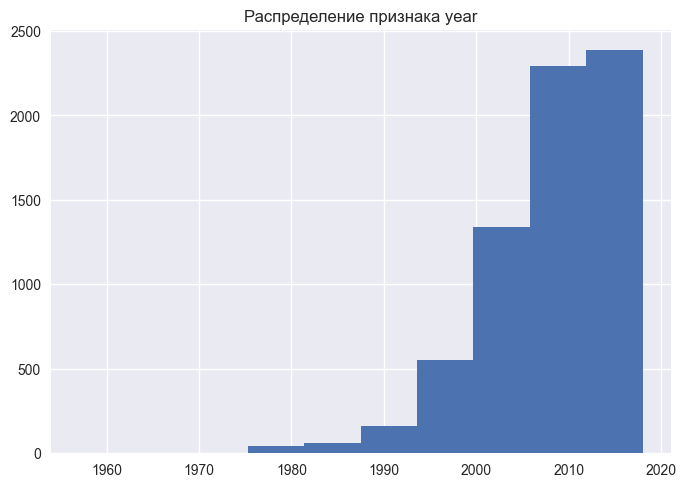

In [805]:
import matplotlib.pyplot as plt

plt.hist(data.year)
plt.title('Распределение признака year');

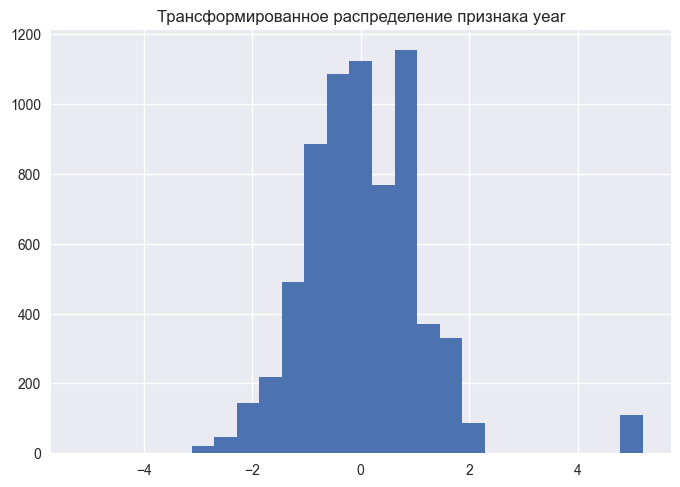

In [806]:
from sklearn.preprocessing import QuantileTransformer
#Данный трансформер принимает на вход 2D-массив, поэтому нам надо
#изменить формат данных (поскольку мы подаем на вход только один столбец)
data_for_transform = data['year'].values.reshape((len(data),1))

quantile = QuantileTransformer(output_distribution='normal')
data_transformer = quantile.fit_transform(data_for_transform)

plt.hist(data_transformer, bins=25)
plt.title('Трансформированное распределение признака year')
plt.show()

### Задание 6.1
Преобразуйте распределение признаков condition и cylinders в равномерное. Какое значение признака condition получится у нулевого объекта? Ответ округлите до второго знака после точки-разделителя.

C:\Users\Андрей\AppData\Local\Temp\ipykernel_10800\3931378559.py:25: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



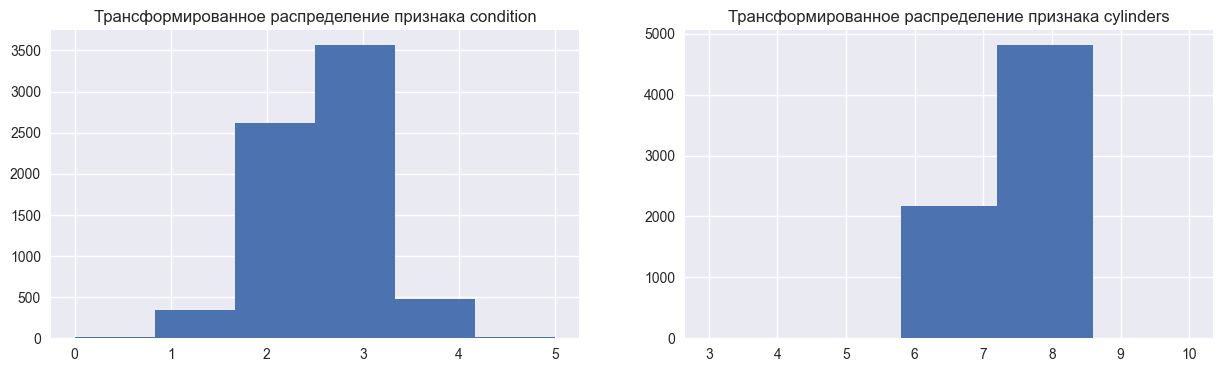

In [807]:
data = pd.read_excel('data/data_ford_price.xlsx')

quantile = QuantileTransformer(output_distribution='uniform')

data_for_transform_6_1_1 = data['condition'].values.reshape((len(data),1))
data_for_transform_6_1_2 = data['cylinders'].values.reshape((len(data),1))

data_transformer_6_1_1 = quantile.fit_transform(data_for_transform_6_1_1)
data_transformer_6_1_2 = quantile.fit_transform(data_for_transform_6_1_2)

fig, axes = plt.subplots(1, 2, figsize = (15, 4))

axes[0].hist(
    data_for_transform_6_1_1,
    bins=6
)
axes[0].set_title('Трансформированное распределение признака condition')

axes[1].hist(
    data_for_transform_6_1_2,
    bins=5
)
axes[1].set_title('Трансформированное распределение признака cylinders')

fig.show()

In [808]:
print('Значение признака condition[0]: ', round(float(data_transformer_6_1_1[0]), 2))

Значение признака condition[0]:  0.96


### Log Transform

Логарифмическое преобразование — один из самых популярных методов преобразования. В основном оно используется для превращения асимметричного распределения в нормальное/менее асимметричное. В этом преобразовании мы берём логарифм значений признака вместо самих значений.

Почему это работает? Потому, что функция логарифма создана для работы с большими числами.

Посмотрим на распределение признака price. Оно асимметрично, причём значения варьируются от 0 до ~300000.

Text(0.5, 1.0, 'Распределение признака price')

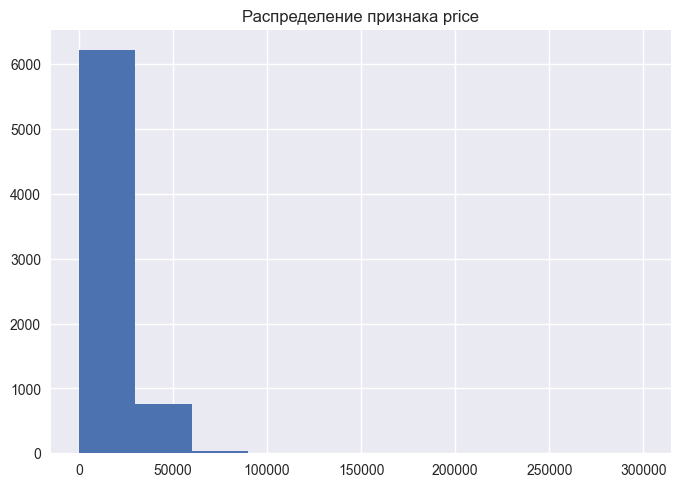

In [809]:
plt.hist(data.price)
plt.title('Распределение признака price')

Идеальный кандидат для логарифмического преобразования — применим его. На этот раз обойдёмся силами numpy.

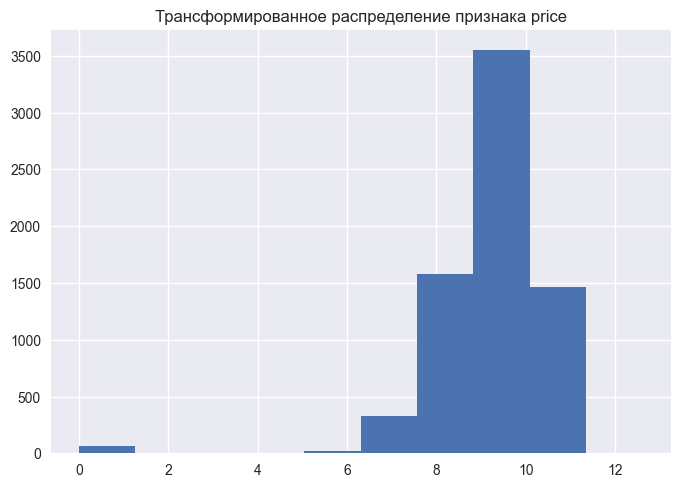

In [810]:
log_price = np.log(data['price'])

plt.hist(log_price)
plt.title('Трансформированное распределение признака price')
plt.show()

Сравним значения исходного и трансформированного признака.

In [811]:
price_data = pd.concat([data['price'], log_price.rename('transformed_price')], axis=1)

price_data.describe()


,price,transformed_price
count,7017.000000,7017.000000
mean,15121.549523,9.204510
std,11765.423119,1.275868
min,1.000000,0.000000
25%,5995.000000,8.698681
50%,12750.000000,9.453287
75%,21995.000000,9.998570
max,299500.000000,12.609870


### Задание 6.3

In [812]:
print('Значение признака transformed_price[-1]: ', round(float(log_price[len(log_price) - 1]), 1))

Значение признака transformed_price[-1]:  9.8


### Power Transformer Scaler

Как и другие скейлеры, с которыми вы уже познакомились, Power Transformer также изменяет распределение переменной, то есть делает его более гауссовым (нормальным).

Однако чтобы использовать все изученные раннее методы трансформации и скейлинга, необходимо сначала понять исходное распределение признака, а затем уже делать выбор. Power Transformer фактически автоматизирует принятие этого решения, вводя параметр, называемый lambda. Он принимает решение об обобщённом степенном преобразовании, находя наилучшее значение  и используя один из следующих параметрических методов:

Преобразование Бокса-Кокса, которое работает для положительных значений признака.
Преобразование Йео-Джонсона, которое учитывает при расчётах нулевые и отрицательные значения обрабатываемых переменных.
В нашем случае мы будем использовать преобразование Бокса-Кокса, так как все значения положительны.

In [813]:
data = pd.read_excel('data/data_ford_price.xlsx')

import pandas as pd
from sklearn.preprocessing import PowerTransformer

#Предположим, что data - это DataFrame с колонками 'price' и 'year'
#Проверим наличие и корректность данных
if 'price' not in data.columns or 'year' not in data.columns:
    raise ValueError("В DataFrame отсутствуют колонки 'price' и 'year'" )

#Проверим, есть ли отрицательные значения или нули
if (data[['price', 'year']] <= 0).any().any():
    raise ValueError('Для переменных Box-Cox все значения должны быть положительными')

#Преобразование с помощью PowerTransformer
box_cox = PowerTransformer(method='box-cox')

#Создадим копию DF для преобразования box-cox scipy
test_data_year = data.copy()

from scipy.stats import boxcox
data_box_cox_price = box_cox.fit_transform(data[['price']].values)


#С этим полная хуйня
data_box_cox_year = boxcox(test_data_year['year'])

display(data_box_cox_price)
display(data_box_cox_year)

#Создадим DF с преобразованными данными
data_box_cox_price = pd.DataFrame(data_box_cox_price, columns=['transformed_price'])
data_box_cox_year = pd.DataFrame(data_box_cox_year, columns=['transformed_year'])

data_box_cox = pd.concat([data_box_cox_price, data_box_cox_year], axis=1)

c:\Program Files (x86)\Python\Lib\site-packages\scipy\stats\_morestats.py:1153: UserWarning:

The optimal lambda is 123.77792357708721, but the returned lambda is the constrained optimum to ensure that the maximum or the minimum of the transformed data does not overflow in <class 'numpy.float64'>.



array([[ 1.91047107],
       [ 0.27035179],
       [-1.36972089],
       ...,
       [-0.23849198],
       [-0.14514779],
       [ 0.46660488]])

(array([1.63988962e+304, 1.18808886e+304, 8.59794557e+303, ...,
        1.03446136e+304, 1.30283322e+304, 1.24415318e+304]),
 92.65624662809293)

TypeError: 'numpy.float64' object is not iterable

In [814]:
display(data_box_cox)

,transformed_price,transformed_year
0,1.910471,NaN
1,0.270352,NaN
2,-1.369721,NaN
3,-1.718754,NaN
4,0.132932,NaN
...,...,...
7012,0.780988,NaN
7013,-0.733027,NaN
7014,-0.238492,NaN
7015,-0.145148,NaN


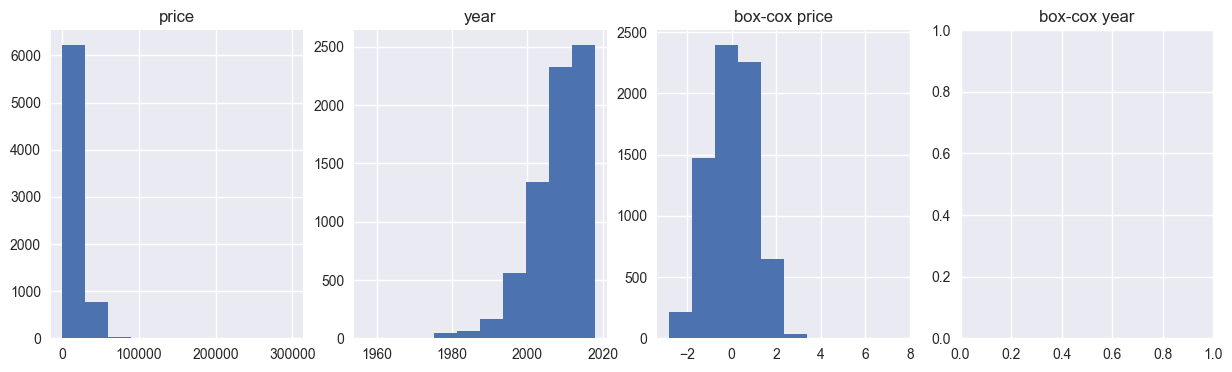

In [815]:
fig, axes = plt.subplots(1, 4, figsize = (15, 4))

axes[0].hist(
    data['price'],
    bins=10
)
axes[0].set_title('price')

axes[1].hist(
    data['year'],
    bins=10
)
axes[1].set_title('year')

axes[2].hist(
    data_box_cox['transformed_price'],
    bins=10
)
axes[2].set_title('box-cox price')

#Без четвертого графика, там мудятина с преобразованием дат
axes[3].set_title('box-cox year');

## Даты и расстояния
По аналогии с датой и временем можно использовать информацию в столбцах, например, широту  и долготу.

Давайте найдём конкретный адрес нулевого объекта, используя широту  и долготу. Для этого нам понадобится библиотека geopy.

In [817]:
from geopy.geocoders import Photon

Создаём объект Nominatim и инициализируем API Nominatim с помощью параметра geoapiExercises.

In [818]:
geolocator = Photon(user_agent="measurements")

Объединим широту и долготу для поиска адреса первого объекта:

In [819]:
data = pd.read_excel('data/data_ford_price.xlsx')

Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Roller Drive, 37663, Kingsport, Tennessee, United States


Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

In [820]:
address = location.raw
address

{'type': 'Feature',
 'properties': {'osm_type': 'W',
  'osm_id': 19621117,
  'osm_key': 'highway',
  'osm_value': 'residential',
  'type': 'street',
  'postcode': '37663',
  'countrycode': 'US',
  'name': 'Roller Drive',
  'country': 'United States',
  'city': 'Kingsport',
  'state': 'Tennessee',
  'county': 'Sullivan',
  'extent': [-82.4840232, 36.4715824, -82.4815338, 36.4688041]},
 'geometry': {'type': 'Point',
  'coordinates': [-82.4825785202503, 36.470010716948366]}}

### Задание 7.2
Найдите почтовый код шестого объекта выборки.

In [821]:
Latitude = str(data['lat'][6])
Longitude =  str(data['long'][6])
location = geolocator.reverse(Latitude+","+Longitude)

address_6 = location.raw

address_6['properties']['postcode']

#С этим проблемы возможно из-за того, что не работает Nominatim
#и пришлось использвоать Photon

'57107'

### *Бонус

С помощью библиотек geopandas и shapely можно визуализировать географические данные. Это значит, что мы можем увидеть расположение наших объектов (автомобилей) на карте мира.

In [822]:
# Установили библиотеки через терминал 
# !pip install geopandas
# !pip install shapely

Отметим расположение объектов нашей выборки зелёным цветом.

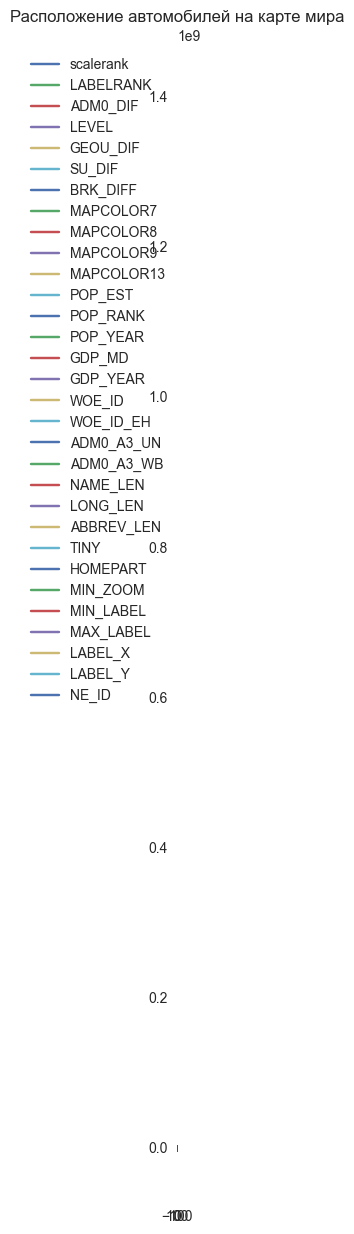

In [823]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

 
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file('data/ne_110m_admin_0_countries.dbf')
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

#Короче, с этой штукой метод говно. Хоть я исправил, но оно нормально не работает
#Не делать так

С помощью Plotly мы можем построить интерактивную карту и отследить изменение цены автомобиля в зависимости от его локации:

In [824]:
import plotly.express as px
import pandas as pd

fig = px.scatter_geo(data, lat='lat', lon='long', hover_name='price')
fig.update_layout(title='Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()

## Отбор признаков: мотивация

Оценим влияние мультиколлинеарности на линейную регрессию

In [847]:
data = pd.read_excel('data/data_ford_price.xlsx')

#Подготавливаем данные
data = data[['price', 'year', 'cylinders', 'odometer', 
             'lat', 'long', 'weather']]
data.dropna(inplace=True)
y = data['price']
X = data.drop(columns='price')
#Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#Инициализируем модель
model = LinearRegression()

#Обучаем модель
model.fit(X_train, y_train)
#Делаем предсказание
y_predicted = model.predict(X_test)

#Находим MAE
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: {:.3f}'.format(mae))

MAE: 4856.318


Мы выяснили, что у нас присутствует сильная зависимость между lat и weather. Удалим lat, так как этот признак, в отличие от weather, необходимо округлять.

In [846]:
data = pd.read_excel('data/data_ford_price.xlsx')

#Подготавливаем данные
data = data[['price', 'year', 'cylinders', 'odometer', 
             'lat', 'long', 'weather']]
data.dropna(inplace=True)
y = data['price']
X = data.drop(columns='price')
X.drop('lat', axis=1, inplace=True)
#Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

#Инициализируем модель
model = LinearRegression()

#Обучаем модель
model.fit(X_train, y_train)
#Делаем предсказание
y_predicted = model.predict(X_test)

#Находим MAE
mae = mean_absolute_error(y_test, y_predicted)
print('MAE: {:.3f}'.format(mae))

#Очень сомнительный модуль, который ничего не объясняет. 
#Воспроизводимости не получается, в отличие от прошлых.
#При этом по их советам стало хуже, чем было.

MAE: 4860.258


## Отбор признаков: классификация методов

### RFE

Выделим три наиболее значимых признака

In [844]:
data = pd.read_excel('data/data_ford_price.xlsx')

#Подготавливаем данные
data = data[['price', 'year', 'cylinders', 'odometer', 
             'lat', 'long', 'weather']]
data.dropna(inplace=True)
y = data['price']
X = data.drop(columns='price')
#Разделяем данные на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=30)

from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X_train, y_train)

selector.get_feature_names_out()

array(['year', 'cylinders', 'lat'], dtype=object)

Также узнаем, как RFE проранжировал все доступные признаки:

In [845]:
print(X_train.columns)
print(selector.ranking_)

Index(['year', 'cylinders', 'odometer', 'lat', 'long', 'weather'], dtype='object')
[1 1 4 1 3 2]


### Методы выбора признаков на основе фильтров

На этот раз odometer оказался в топе.

In [848]:
from sklearn.feature_selection import SelectKBest, f_regression

selector = SelectKBest(f_regression, k=3)
selector.fit(X_train, y_train)

selector.get_feature_names_out()

array(['year', 'cylinders', 'odometer'], dtype=object)